<a href="https://colab.research.google.com/github/misheljoy/Projects/blob/main/Aerofit_Customer_Profiling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2023-03-11 11:33:37--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.173, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749.3’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-03-11 11:33:37 (1005 MB/s) - ‘aerofit_treadmill.csv?1639992749.3’ saved [7279/7279]



# Defining Problem Statement and Analysing basic metrics
Observations on shape of data, data types of all the attributes, statistical summary

In [ ]:
# importing necessory modules for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# analysing content of data
aerofit = pd.read_csv("aerofit_treadmill.csv?1639992749")
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# null value evaluation
aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
type(aerofit)

pandas.core.frame.DataFrame

In [ ]:
aerofit.shape

(180, 9)

In [ ]:
# statistical summary
aerofit.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000



Observation:
*  The data set have 9 columns and 180 rows
*  There are no null values in the given data set
*  Out of 9 columns, 6 are numerical data and 3 are categorical data
*  There are three unique products
      *  The KP281 is an entry-level treadmill that sells for $1,500.
      *  The KP481 is for mid-level runners that sell for $1,750.
      *  The KP781 treadmill is having advanced features that sell for $2,500
* Income and Miles have comparitively large standered deviations than the mean value
*   The number of male customers are more
*   The number of partnered customers are more



# Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
d1 = pd.DataFrame(aerofit['Product'].value_counts().reset_index())
d1.columns= ['Product',"Count"]
d1

,Product,Count
0,KP281,80
1,KP481,60
2,KP781,40


In [ ]:
aerofit['Age'].value_counts(bins =10 ,sort=False)

(17.967, 21.2]    17
(21.2, 24.4]      37
(24.4, 27.6]      44
(27.6, 30.8]      22
(30.8, 34.0]      24
(34.0, 37.2]      11
(37.2, 40.4]      13
(40.4, 43.6]       3
(43.6, 46.8]       4
(46.8, 50.0]       5
Name: Age, dtype: int64

In [ ]:
aerofit['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
aerofit['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
aerofit['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
d2 = pd.DataFrame(aerofit.groupby('Gender')['Product'].value_counts())
d2.rename({"Product":"Product Count"},axis = 1)

Product Count
Gender Product               
Female KP281               40
       KP481               29
       KP781                7
Male   KP281               40
       KP781               33
       KP481               31

In [ ]:
d3 = pd.DataFrame(aerofit.groupby('MaritalStatus')['Product'].value_counts())
d3.rename({"Product":"Product Count"},axis = 1)

Product Count
MaritalStatus Product               
Partnered     KP281               48
              KP481               36
              KP781               23
Single        KP281               32
              KP481               24
              KP781               17

In [ ]:
d4 = pd.DataFrame(aerofit.groupby('Usage')['Product'].value_counts())
d4.rename({"Product":"Product Count"},axis = 1)

Product Count
Usage Product               
2     KP281               19
      KP481               14
3     KP281               37
      KP481               31
      KP781                1
4     KP281               22
      KP781               18
      KP481               12
5     KP781               12
      KP481                3
      KP281                2
6     KP781                7
7     KP781                2

In [ ]:
d5 = pd.DataFrame(aerofit.groupby('Fitness')['Product'].value_counts())
d5.rename({"Product":"Product Count"},axis = 1)

Product Count
Fitness Product               
1       KP281                1
        KP481                1
2       KP281               14
        KP481               12
3       KP281               54
        KP481               39
        KP781                4
4       KP281                9
        KP481                8
        KP781                7
5       KP781               29
        KP281                2

In [ ]:
d6 = pd.DataFrame(aerofit.groupby('Education')['Product'].value_counts())
d6.rename({"Product":"Product Count"},axis = 1)

Product Count
Education Product               
12        KP281                2
          KP481                1
13        KP281                3
          KP481                2
14        KP281               30
          KP481               23
          KP781                2
15        KP281                4
          KP481                1
16        KP281               39
          KP481               31
          KP781               15
18        KP781               19
          KP281                2
          KP481                2
20        KP781                1
21        KP781                3

In [ ]:
d7 = pd.DataFrame(aerofit.groupby('Product')['Income'].mean())
d7.rename({"Income":"Average Income"},axis = 1)

,Average Income
Product,
KP281,46418.025
KP481,48973.650
KP781,75441.575


In [ ]:
d7 = pd.DataFrame(aerofit.groupby('Product')['Miles'].mean())
d7.rename({"Miles":"Average Miles"},axis = 1)

,Average Miles
Product,
KP281,82.787500
KP481,87.933333
KP781,166.900000


Observation:
*  The popularity of the product follows the order KP281 > KP481 >KP781
*  The customers are mainly from the age group 20-30. The number of customers above 35 is low.
*  Majority have usage between 3-4.
*  average fitness value is 3.3.
*  Most Customers have education between 16-18.
*  Female customers dont prefer product:KP781.
*  marital status doesnot affect the product preferences although there are more partnered customers than single customers.
*  Customers having usage value 2-3 dont prefer product:KP781, where as customers having usage value >=5 prefer product:KP781 over other two.
*  Customers having fitness value 1-3 dont prefer product:KP781, where as customers having fitness value =5 prefer product:KP781 over other two.
*  Higher the education more lineancy towards product:KP781
*  Average income of product:KP781 users is much higher than other two product users.
*  Average Miles of product:KP781 users is much higher than other two product users




# Missing Value & Outlier Detection


In [ ]:
# null value evaluation
aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

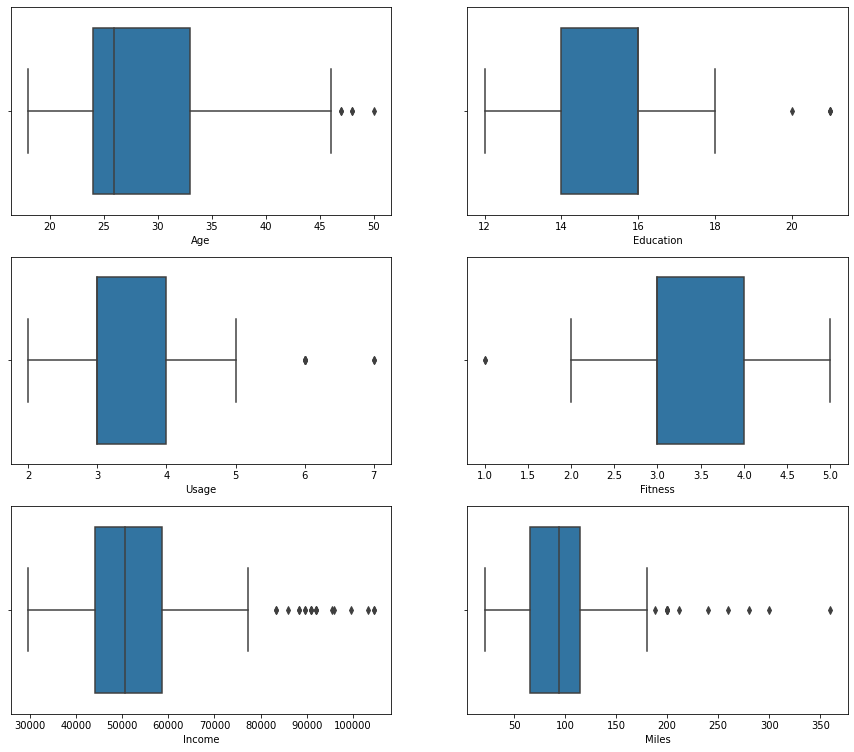

In [ ]:
# Oulier Detection
graph, axis = plt.subplots(nrows=3, ncols=2, figsize=(15, 13))

sns.boxplot(data=aerofit, x="Age", ax=axis[0,0])
sns.boxplot(data=aerofit, x="Education", ax=axis[0,1])
sns.boxplot(data=aerofit, x="Usage", ax=axis[1,0])
sns.boxplot(data=aerofit, x="Fitness", ax=axis[1,1])
sns.boxplot(data=aerofit, x="Income", ax=axis[2,0])
sns.boxplot(data=aerofit, x="Miles", ax=axis[2,1])
plt.show()

Observation:
*  There are no null values in this data.
*  There are many outliers in Income and Miles. Outliers in the other four numerical variables(Usage,Fitness,Education,Age) are less.



# Visual Analysis
Univariate

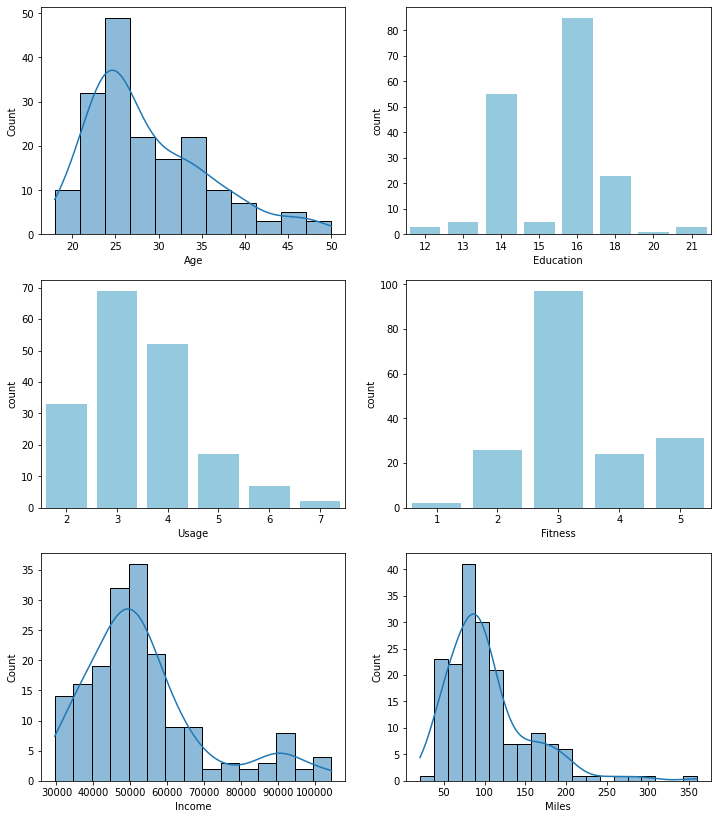

In [ ]:
# distribution graph is outdated hence not prefarable. For the visual analysis of the distribution of variables Histogram and Countplot are used

graph, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
graph.subplots_adjust(top=1.2)

sns.histplot( x=aerofit["Age"], kde=True, ax=axis[0,0])
sns.countplot( x=aerofit["Education"], ax=axis[0,1],color="skyblue")
sns.countplot( x=aerofit["Usage"], ax=axis[1,0],color="skyblue")
sns.countplot( x=aerofit["Fitness"], ax=axis[1,1],color="skyblue")
sns.histplot( x=aerofit["Income"], kde=True, ax=axis[2,0])
sns.histplot( x=aerofit["Miles"], kde=True, ax=axis[2,1])
plt.show()

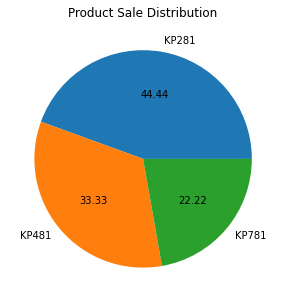

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(x=d1["Count"], labels=d1["Product"], autopct='%.2f')
plt.title('Product Sale Distribution')
plt.show()

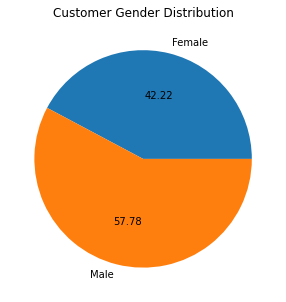

In [ ]:
df1 = aerofit.groupby("Gender")["Product"].count()
plt.figure(figsize=(8,5))
plt.pie(x=df1.values, labels=df1.index, autopct='%.2f')
plt.title('Customer Gender Distribution')
plt.show()

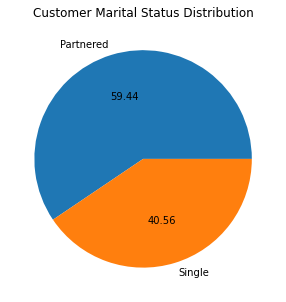

In [ ]:
df1 = aerofit.groupby("MaritalStatus")["Product"].count()
plt.figure(figsize=(8,5))
plt.pie(x=df1.values, labels=df1.index, autopct='%.2f')
plt.title('Customer Marital Status Distribution')
plt.show()

Observation:
*   Customers are mostly from 20-30 age group
*   Customers with education 16,14 are high
*   Customers with usage 2-4 are more
*   Customers with fitness value 3 are more
*   Product:
    *   44.44% of the customers have purchased KP2821 product.
    *   33.33% of the customers have purchased KP481 product.
    *   22.22% of the customers have purchased KP781 product
*   Gender
    *   57.78% of the customers are Male.
    *   42.22% of the customers are Female.
*   Marital Status
    *   59.44% of the customers are Partnered
    *   40.56% of the customers are Single







# Correlation among different factors using Heatmaps or Pairplots

<AxesSubplot:>

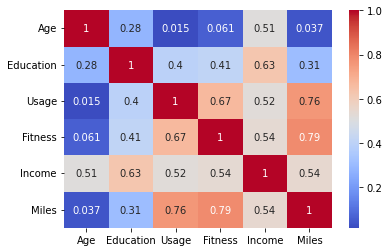

In [ ]:
sns.heatmap(aerofit.corr(),annot = True,cmap ="coolwarm")

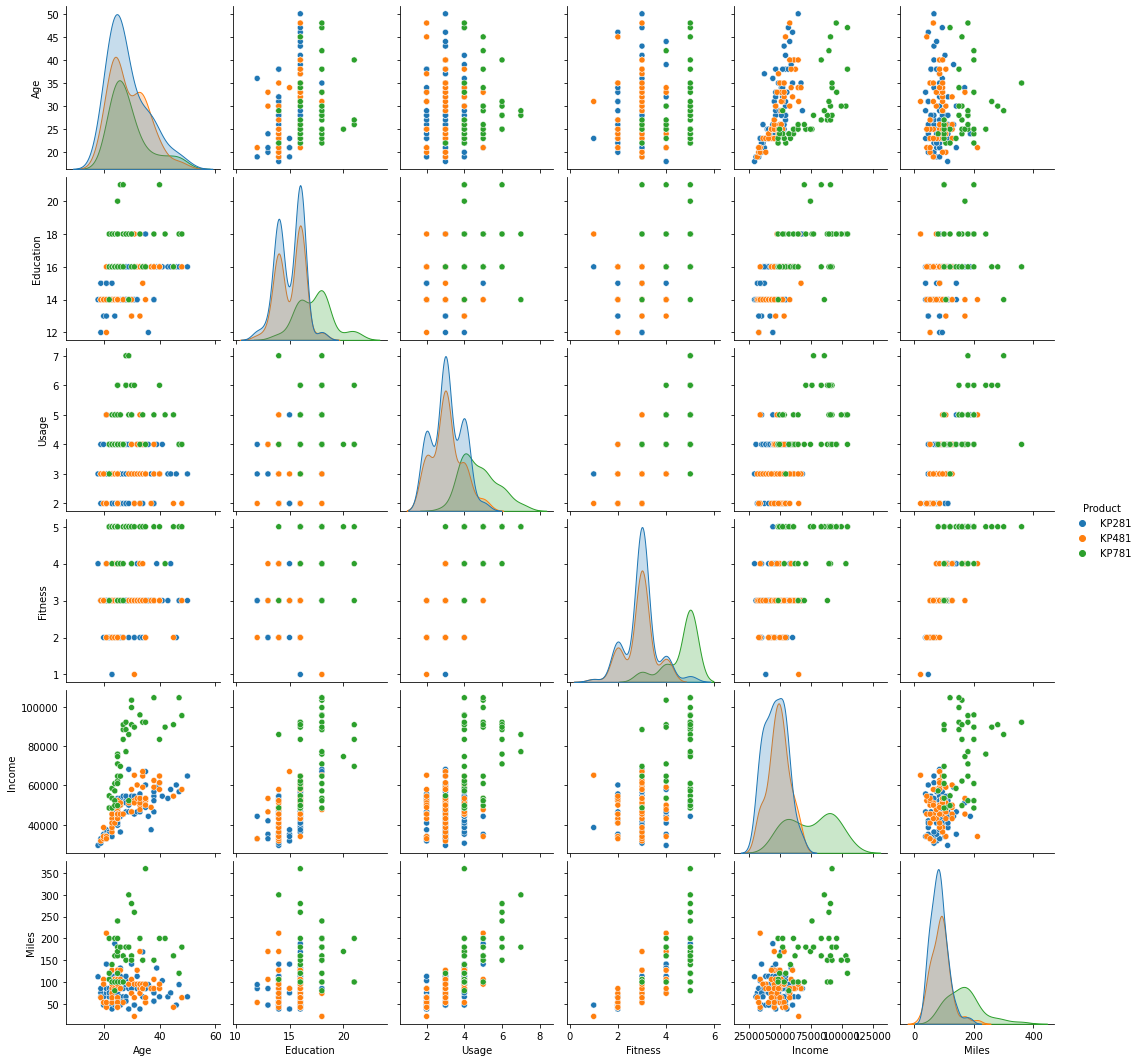

In [ ]:
sns.pairplot(aerofit, hue = "Product" )

Observation:
*   The attributes with high correlations are:-
    *   income and education
    *   fitness and usage
    *   miles and usage
    *   miles and fitness
*   income increases with higher education and product KP781 are prefered by customers with high income
*   fitness value and miles inceases with higher usage.Product KP781 are prefered by these coustomes.




**Bivariate Analysis**

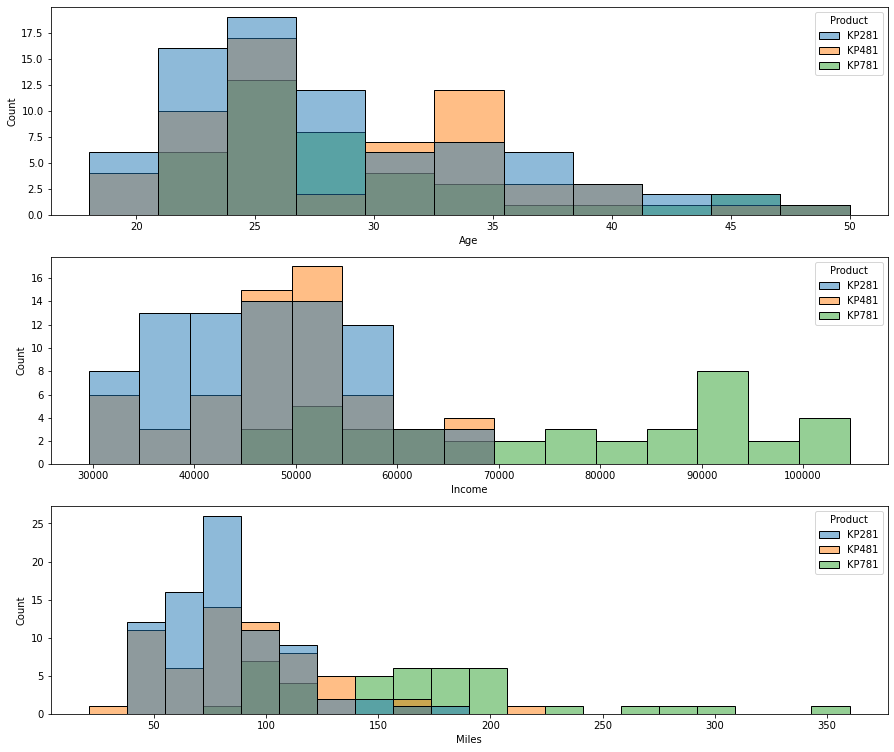

In [ ]:
graph,axis = plt.subplots(nrows = 3 ,figsize = (15,13))

sns.histplot(data=aerofit, x="Age", hue = "Product",ax=axis[0])
sns.histplot(data=aerofit, x="Income", hue = "Product" ,ax=axis[1])
sns.histplot(data=aerofit, x="Miles", hue = "Product", ax=axis[2])
plt.show()

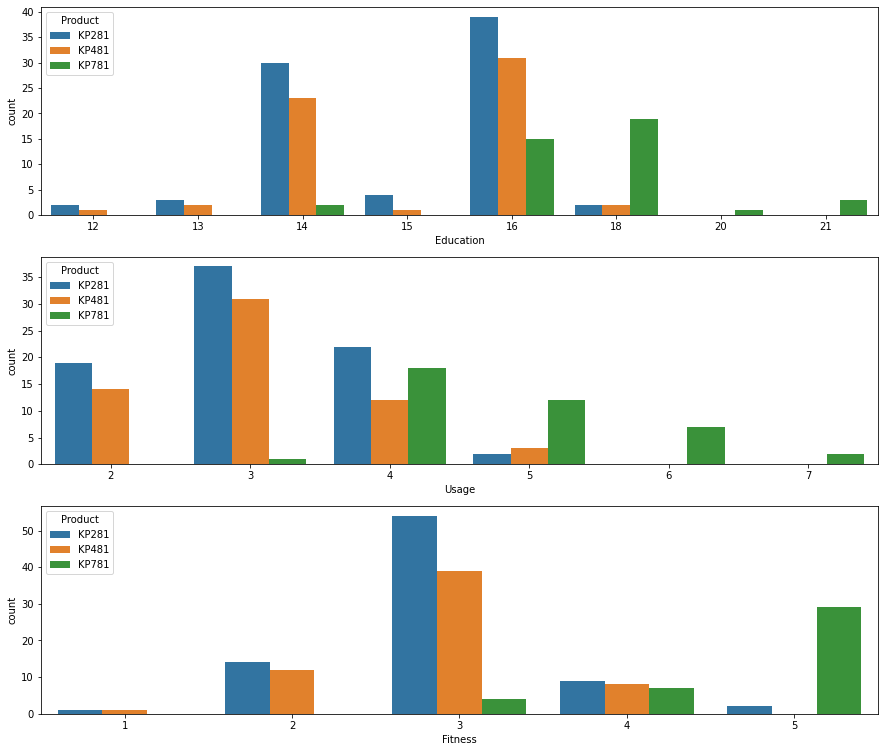

In [ ]:
graph,axis = plt.subplots(nrows = 3 ,figsize = (15,13))

sns.countplot(data=aerofit, x="Education", hue = "Product",ax=axis[0])
sns.countplot(data=aerofit, x="Usage", hue = "Product" ,ax=axis[1])
sns.countplot(data=aerofit, x="Fitness", hue = "Product", ax=axis[2])
plt.show()

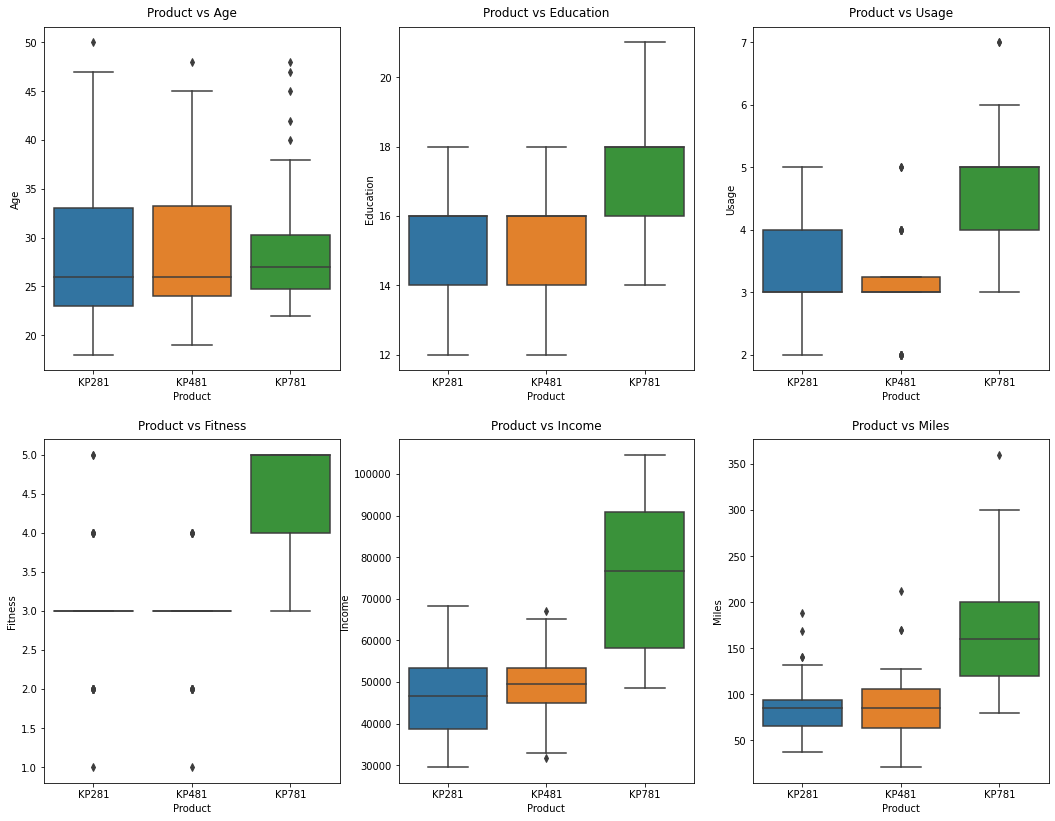

In [ ]:
columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=aerofit, x='Product', y=columns[value], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {columns[value]}", pad=10)
        value += 1

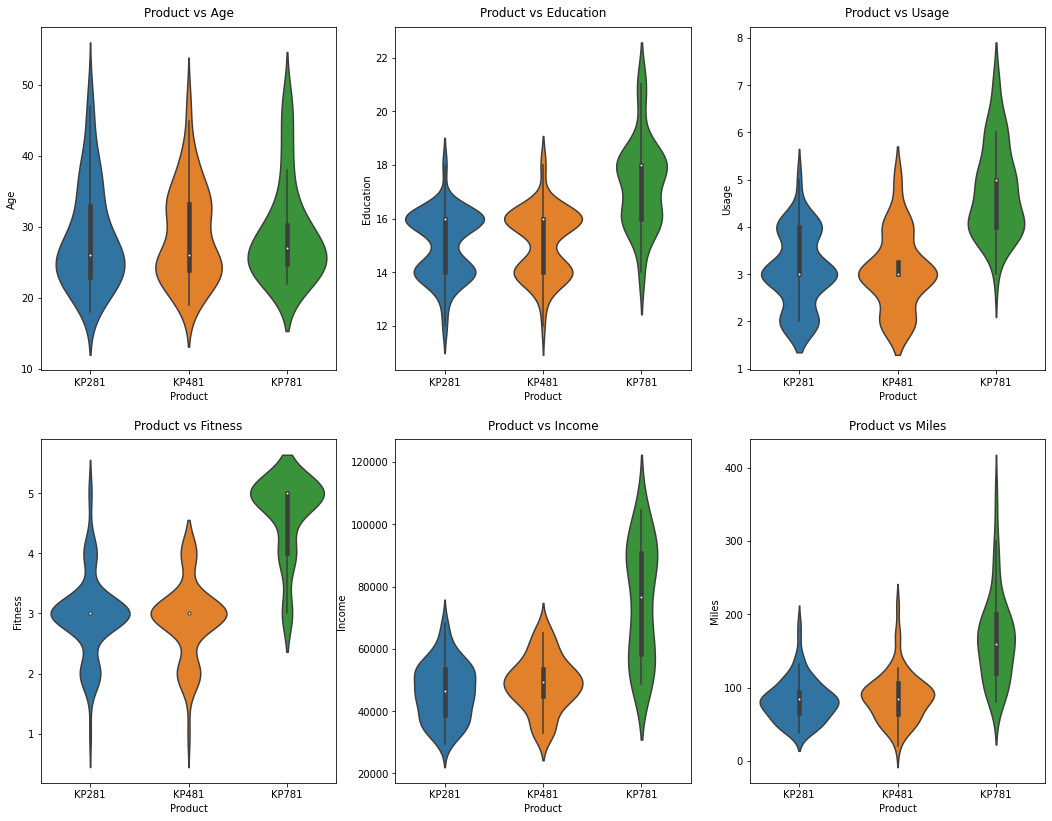

In [ ]:
columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(3):
        sns.violinplot(data=aerofit, x='Product', y=columns[value], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {columns[value]}", pad=10)
        value += 1

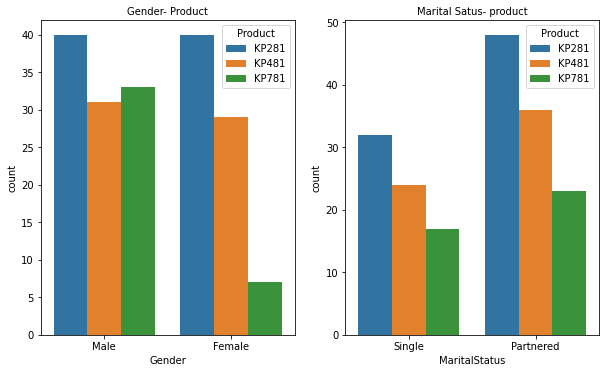

In [ ]:
# Effect of marital status, age ,gender on the product purchased
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.subplots_adjust(top=1)
sns.countplot(data=aerofit, x='Gender',hue="Product", ax=axis[0])
axis[0].set_title("Gender- Product", pad=5, fontsize=10)
sns.countplot(data=aerofit, x='MaritalStatus', hue="Product",ax=axis[1])
axis[1].set_title("Marital Satus- product", pad=5, fontsize=10)
plt.show()

Observation:
* Age - variation over Product
    1. Mean age of customers using product KP781 is little bit more than remaining two.
    3. 75% of customers who are using product KP281 and KP481 are below 33
    4. 75% of customers who are using product KP781 are below 30 years.
* Education - variation over Product
    1. Customers using product KP281 and KP481 have  14 to 16 years of education.
    2. Customers using 16having  to 18 years in education uses product KP781
* Usage - variation over product
    1. For product KP281, maximum customers are using it 3 to 4 times a week.
    2. For product KP481, all customers except three, are using it 3 times a week.
    3. for product KP781, mostly customers are having usage 4 and above in a week.
* Fitness-variation over Product
    1. Customers who have rated their fitness as 3 are more likely to use product KP281 and KP481.
    2. Customers who have rated their fitness as 4 and 5 are more likely to use product KP781.
* Income - variation over Product
    1. The mean income of customers using product KP281 and KP481 is less
  compared to customers using product KP781.
    2. it is safe to assume customers having income > 70000 uses KP781.
* Miles - variation over product
    1. Customers using product KP781 are more likely to cover more miles compare to other two products.
* Female customers dont prefer product:KP781.
* marital status doesnot affect the product preferences although there are more partnered customers than single customers.







**Multivariate** **Analysis**

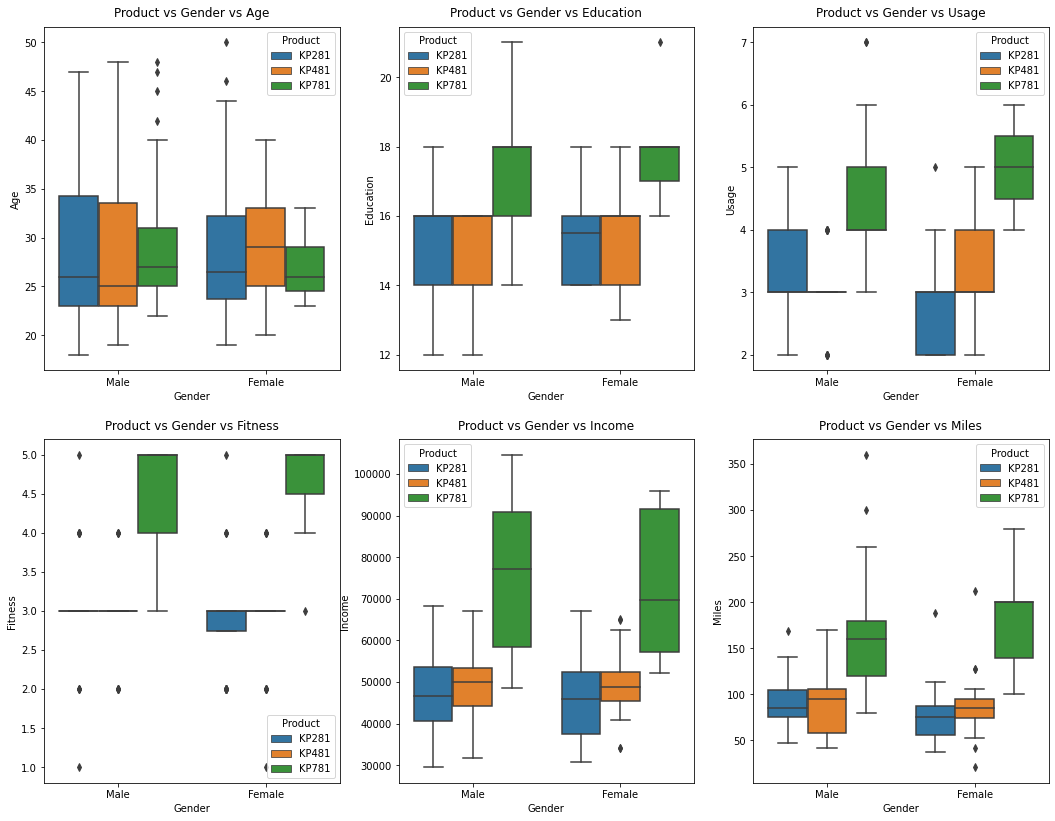

In [ ]:
columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=aerofit, x='Gender', y=columns[value],hue="Product", ax=axs[i,j])
        axs[i,j].set_title(f"Product vs Gender vs {columns[value]}", pad=10)
        value += 1

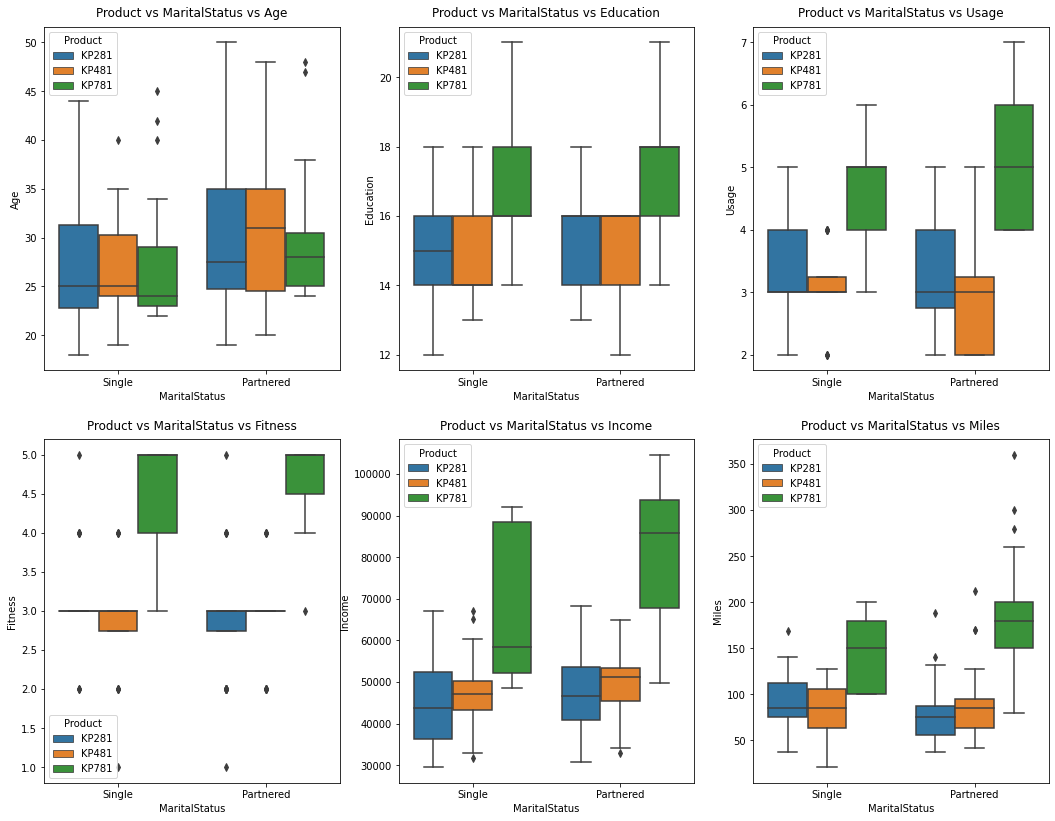

In [ ]:
columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=aerofit, x='MaritalStatus', y=columns[value],hue="Product", ax=axs[i,j])
        axs[i,j].set_title(f"Product vs MaritalStatus vs {columns[value]}", pad=10)
        value += 1

Observation:
*   It can be observed that for Income, Education and Miles field, irrespective of Gender and Marital status, higher these values product KP781 is more favorable than other two.
*   For Age field, reverse can be seen, the age group of customers using product KP781 is less than other product categories, irrespective of Gender and Marital status
* Females with usage 2-3 times a week would mostly prefer KP281 and usage 3-4 times a week would mostly prefer KP481
* parnered people with usage 2-3 times a week would mostly prefer KP481 and usage 3-4 times a week would mostly prefer KP281





# Customer Profiling
**Marginal Probability**

In [ ]:
mp = pd.DataFrame(aerofit['Product'].value_counts(normalize=True).round(2).reset_index())
mp = mp.rename({"index":"Product","Product":"Probability"},axis = 1)
mp

,Product,Probability
0,KP281,0.44
1,KP481,0.33
2,KP781,0.22


**Conditional Probability**

In [ ]:
x = pd.crosstab(index=aerofit['Gender'], columns=[aerofit['Product']])
x

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [ ]:
print(f"P(Male): {x.loc['Male'].sum()/len(aerofit):.2f}")
print(f"P(Female): {x.loc['Female'].sum()/len(aerofit):.2f}\n")

P(Male): 0.58
P(Female): 0.42



In [ ]:
def gender(gender):
    p_781 = x['KP781'][gender] / x.loc[gender].sum()
    p_481 = x['KP481'][gender] / x.loc[gender].sum()
    p_281 = x['KP281'][gender] /x.loc[gender].sum()

    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

gender('Male')
gender('Female')

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



In [ ]:
y = pd.crosstab(index=aerofit['MaritalStatus'], columns=[aerofit['Product']])
y

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [ ]:
print(f"P(Single): {y.loc['Single'].sum()/len(aerofit):.2f}")
print(f"P(Partnered): {y.loc['Partnered'].sum()/len(aerofit):.2f}\n")

P(Single): 0.41
P(Partnered): 0.59



In [ ]:
def MS(ms):
    p_781 = y['KP781'][ms] / y.loc[ms].sum()
    p_481 = y['KP481'][ms] / y.loc[ms].sum()
    p_281 = y['KP281'][ms] /y.loc[ms].sum()

    print(f"P(KP781/{ms}): {p_781:.2f}")
    print(f"P(KP481/{ms}): {p_481:.2f}")
    print(f"P(KP281/{ms}): {p_281:.2f}\n")

MS('Single')
MS('Partnered')

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



# Business Insights
# KP281
  *   Around 44% from total customers are using this product
  *   Probabilty od females chosing this product is slightly higher than males using this
  *   Marital status of a person doesnt have much effect on probability chosing this product
  *   Females with usage 2-3 times a week would mostly prefer KP281
  *  Parnered people usage 3-4 times a week would mostly prefer KP281
  * The annual income of customers using this product is less as compared
to customers using other products.
  *   Customers using this product covered less miles compared to other
products.

# KP481
  *   Around 33% from total customers are using this product
  *   Probabilty of females chosing this product is slightly higher than males using this
  *   Marital status of a person doesnt have much effect on probability chosing this product
  *   Females with usage 3-4 times a week would mostly prefer KP481
  *  Parnered people usage 2-3 times a week would mostly prefer KP481

# KP781
  *   Around 22% from total customers are using this product
  *   Probabilty of females chosing this product is very low
  *   Marital status of a person doesnt have much effect on probability chosing this product
  * people having high Income prefer this product
  * Fitness enthusiats with high usage, miles, and fitness values might also prefer this product




# Recommendations
1. company can come up with a survey enwuring the education, age , usage gender, fitness scale ect of the customer. Based on the gathered information, company can promote their product category in right direction.
2. Education is directly propotinal to income in most cases, for a highly eduated person who is fitness enthusiast KP781 can be recomended
3. No matter whether customer is young or middle-aged, if the customer is earning quite well, company
should recommend product KP781.
4. Begginer level people and people with less income should be recomended with KP281
5. If the customers of any age are earning average and but a fitness enthusiast shape, product KP481 must be
recommended to them.
6. For partnered customers even with low usage KP481 can be recomended before KP281.
7. For Single customers, KP281 is best choice.
8. Why women are not choosing KP781 need to be figured
9. Higher sale of product KP781 will fetch more revenue. Hence, company should promote this product. However, company should not be rigid. If the customer is less enthusiast and not earning good, company should come
up with KP281.
10. Women with low usage have high preference towards KP281